In [40]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv('archives/dados_bacen.csv', index_col=0)
df

,Dólar (PTAX),Selic Diária (%),Selic Anual (%),IPCA Anual (%),Fed Rate (%)
2000-01-01,1.8003,0.069186,0.190399,0.0885,0.0545
2000-01-02,1.8003,0.069186,0.190399,0.0885,0.0545
2000-01-03,1.8003,0.069186,0.190399,0.0885,0.0545
2000-01-04,1.8329,0.069186,0.190399,0.0885,0.0545
2000-01-05,1.8536,0.069220,0.190501,0.0885,0.0545
...,...,...,...,...,...
2025-12-27,5.5407,0.055131,0.149000,0.0446,0.0372
2025-12-28,5.5407,0.055131,0.149000,0.0446,0.0372
2025-12-29,5.5733,0.055131,0.149000,0.0446,0.0372
2025-12-30,5.5018,0.055131,0.149000,0.0446,0.0372


In [42]:
import matplotlib.pyplot as plt

In [43]:
# Certifique-se de que a coluna de data é o índice e está no formato datetime
df.index = pd.to_datetime(df.index)

In [44]:
df['Spread Fed-Selic'] = df['Selic Anual (%)'] - df['Fed Rate (%)']
df['Spread Fed-Selic'].mean()

np.float64(0.10281792077659081)

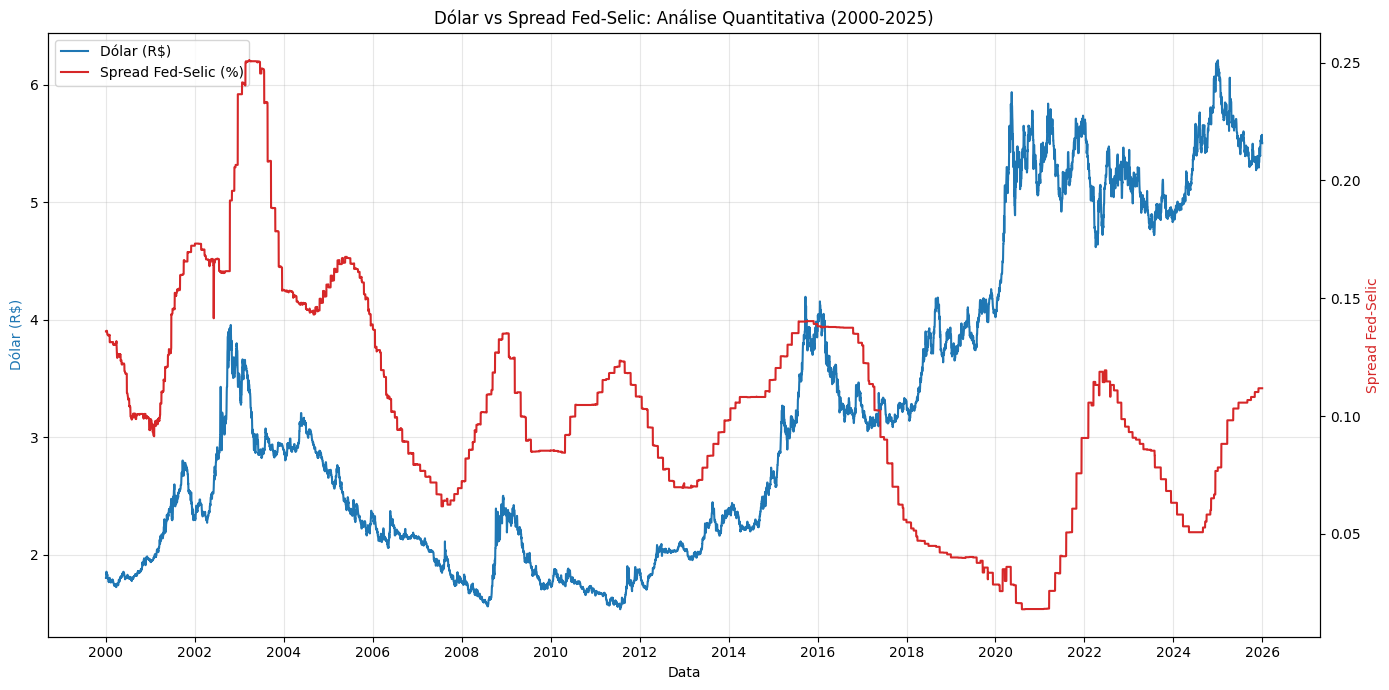

Correlação calculada: -0.2682


In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 4. Visualização
fig, ax1 = plt.subplots(figsize=(14, 7)) # Aumentei um pouco a largura para caber os rótulos

ax1.set_xlabel('Data')
ax1.set_ylabel('Dólar (R$)', color='tab:blue')
lns1 = ax1.plot(df.index, df['Dólar (PTAX)'], color='tab:blue', lw=1.5, label='Dólar (R$)')

# Criando o segundo eixo
ax2 = ax1.twinx()
ax2.set_ylabel('Spread Fed-Selic', color='tab:red')
lns2 = ax2.plot(df.index, df['Spread Fed-Selic'], color='tab:red', lw=1.5, label='Spread Fed-Selic (%)')

# --- CONFIGURAÇÃO DO EIXO X (2 EM 2 ANOS) ---
ax1.xaxis.set_major_locator(mdates.YearLocator(2)) # Define o intervalo de 2 anos
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Formata para mostrar apenas o ano
plt.xticks(rotation=45) # Rotaciona para evitar sobreposição

# --- LEGENDA UNIFICADA ---
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left')

plt.title('Dólar vs Spread Fed-Selic: Análise Quantitativa (2000-2025)')
ax1.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Correlação calculada: {df.corr().iloc[0,1]:.4f}")

In [58]:
import numpy as np
import pandas as pd

# 1. Primeiro, garanta que os dados originais estão limpos
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Dólar (PTAX)', 'Fed Rate (%)'])

# 2. Calcule a correlação (Terceira Variável)
df['corr_spread_dolar'] = df['Dólar (PTAX)'].rolling(window=90, min_periods=90).corr(df['Spread Fed-Selic'])

# 3. TRATAMENTO ESSENCIAL: Remova os NaNs gerados pelo cálculo móvel 
# ou preencha-os se não quiser perder linhas.
# Aqui removemos apenas as linhas onde a correlação não pôde ser calculada.
df = df.dropna(subset=['corr_spread_dolar'])

# 4. Para análise recente (como seus dados são diários, tail(24) são apenas ~1 mês)
# Se quiser os últimos 2 anos reais, use tail(504)
analise_recente = df.tail(500) 
print(analise_recente['corr_spread_dolar'])

2024-08-02   -0.344721
2024-08-03   -0.300686
2024-08-04   -0.248302
2024-08-05   -0.170359
2024-08-06        -inf
                ...   
2025-12-27    0.281342
2025-12-28    0.287145
2025-12-29    0.292980
2025-12-30    0.296295
2025-12-31    0.302302
Name: corr_spread_dolar, Length: 500, dtype: float64


In [59]:
df.head(10)

,Dólar (PTAX),Selic Diária (%),Selic Anual (%),IPCA Anual (%),Fed Rate (%),Spread Fed-Selic,corr_spread_dolar
2000-10-24,1.8973,0.060963,0.166001,0.0665,0.0651,0.100901,0.592076
2000-10-25,1.9274,0.060963,0.166001,0.0665,0.0651,0.100901,0.569414
2000-10-26,1.9332,0.060963,0.166001,0.0665,0.0651,0.100901,0.543003
2000-10-27,1.9232,0.060963,0.166001,0.0665,0.0651,0.100901,0.521271
2000-10-28,1.9232,0.060963,0.166001,0.0665,0.0651,0.100901,0.499576
2000-10-29,1.9232,0.060963,0.166001,0.0665,0.0651,0.100901,0.467915
2000-10-30,1.9176,0.060963,0.166001,0.0665,0.0651,0.100901,0.447984
2000-10-31,1.9082,0.060929,0.165901,0.0665,0.0651,0.100801,0.430813
2000-11-01,1.9091,0.060724,0.165299,0.0599,0.0651,0.100199,0.398082
2000-11-02,1.9091,0.060724,0.165299,0.0599,0.0651,0.100199,0.357903


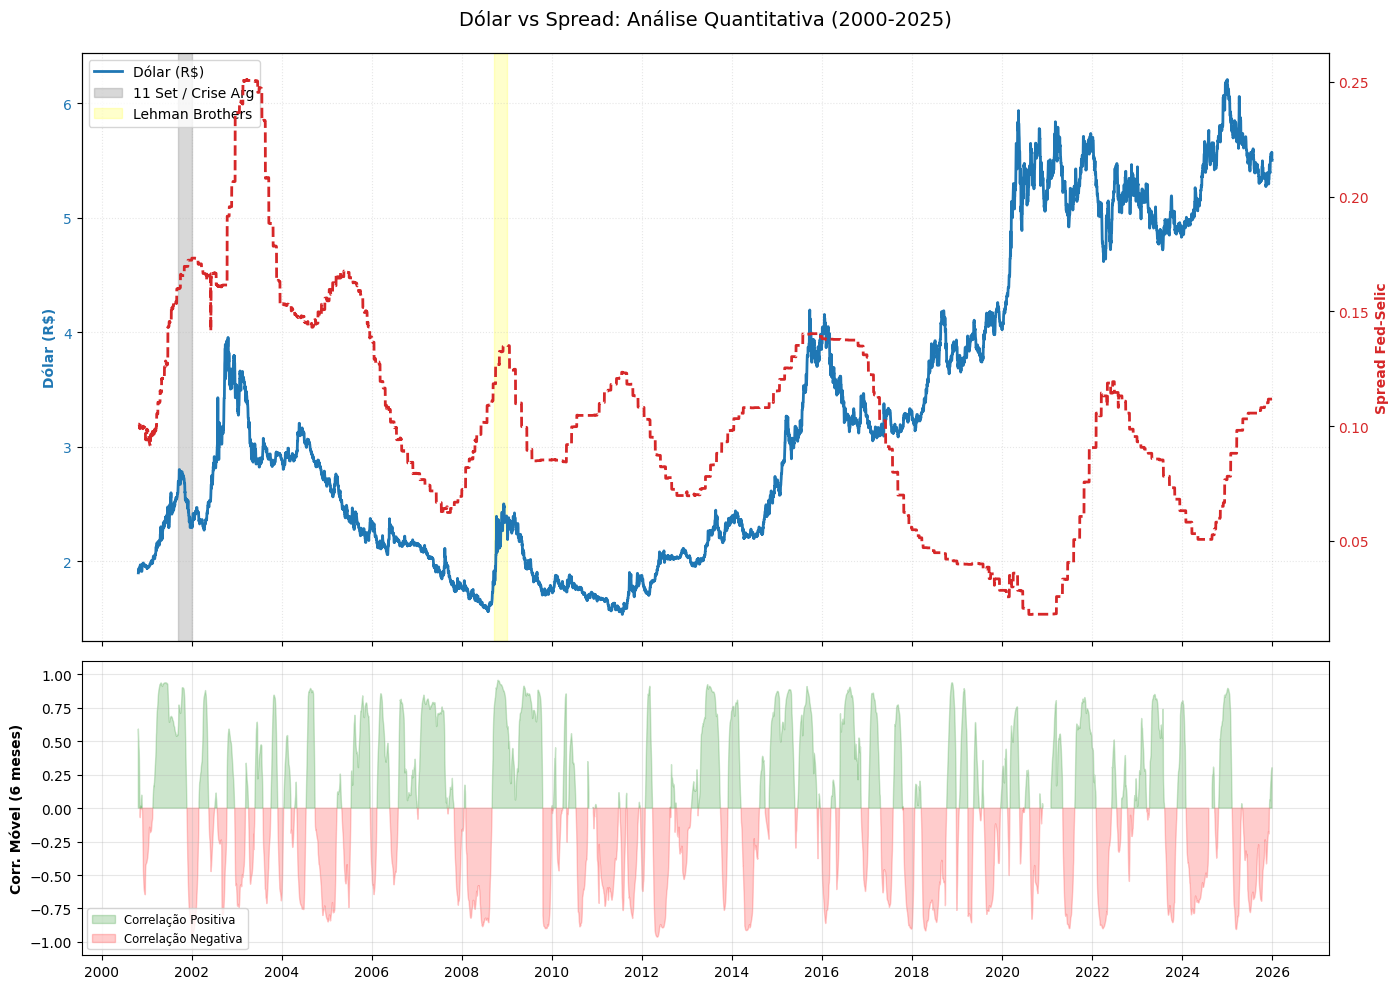

Correlação Histórica Total: -0.3125


In [60]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# --- LIMPEZA DE DADOS (Tratando o 'inf' e 'NaN' que você mencionou) ---
df['corr_spread_dolar'] = df['corr_spread_dolar'].replace([np.inf, -np.inf], np.nan)

# 4. Visualização com Subplots (2 linhas, 1 coluna)
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, 
                               gridspec_kw={'height_ratios': [2, 1]})

# --- GRÁFICO SUPERIOR: DÓLAR VS SELIC ---
ax1.set_ylabel('Dólar (R$)', color='tab:blue', fontweight='bold')
lns1 = ax1.plot(df.index, df['Dólar (PTAX)'], color='tab:blue', lw=2, label='Dólar (R$)')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Segundo eixo para a Selic
ax2 = ax1.twinx()
ax2.set_ylabel('Spread Fed-Selic', color='tab:red', fontweight='bold')
lns2 = ax2.plot(df.index, df['Spread Fed-Selic'], color='tab:red', lw=2, label='Spread Fed-Selic', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Legenda unificada para o gráfico superior
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper left', frameon=True, shadow=True)
ax1.set_title('Dólar vs Spread: Análise Quantitativa (2000-2025)', fontsize=14, pad=20)
ax1.grid(alpha=0.3, linestyle=':')

# --- GRÁFICO INFERIOR: CORRELAÇÃO MÓVEL ---
ax3.set_ylabel('Corr. Móvel (6 meses)', fontweight='bold')

# Estilização da Correlação: Preenche áreas positivas e negativas
ax3.fill_between(df.index, 0, df['corr_spread_dolar'], where=(df['corr_spread_dolar'] >= 0), 
                 color='green', alpha=0.2, label='Correlação Positiva')
ax3.fill_between(df.index, 0, df['corr_spread_dolar'], where=(df['corr_spread_dolar'] < 0), 
                 color='red', alpha=0.2, label='Correlação Negativa')

# ax3.axhline(0, color='black', lw=1, ls='-') # Linha de referência no zero
ax3.set_ylim(-1.1, 1.1) # Limite padrão da correlação
ax3.grid(alpha=0.3)
ax3.legend(loc='lower left', fontsize='small')

# --- CONFIGURAÇÃO DO EIXO X ---
ax3.xaxis.set_major_locator(mdates.YearLocator(2))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Destacando o 11 de Setembro e Crise de 2008
ax1.axvspan('2001-09-11', '2001-12-31', color='gray', alpha=0.3, label='11 Set / Crise Arg')
ax1.axvspan('2008-09-15', '2008-12-31', color='yellow', alpha=0.2, label='Lehman Brothers')

# Adicionando a legenda para os destaques
ax1.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Correlação do período total para referência
print(f"Correlação Histórica Total: {df['Dólar (PTAX)'].corr(df['Spread Fed-Selic']):.4f}")

In [61]:
df['Spread Fed-Selic'].mean

<bound method Series.mean of 2000-10-24    0.100901
2000-10-25    0.100901
2000-10-26    0.100901
2000-10-27    0.100901
2000-10-28    0.100901
                ...   
2025-12-27    0.111800
2025-12-28    0.111800
2025-12-29    0.111800
2025-12-30    0.111800
2025-12-31    0.111800
Name: Spread Fed-Selic, Length: 9142, dtype: float64>

In [62]:
df

,Dólar (PTAX),Selic Diária (%),Selic Anual (%),IPCA Anual (%),Fed Rate (%),Spread Fed-Selic,corr_spread_dolar
2000-10-24,1.8973,0.060963,0.166001,0.0665,0.0651,0.100901,0.592076
2000-10-25,1.9274,0.060963,0.166001,0.0665,0.0651,0.100901,0.569414
2000-10-26,1.9332,0.060963,0.166001,0.0665,0.0651,0.100901,0.543003
2000-10-27,1.9232,0.060963,0.166001,0.0665,0.0651,0.100901,0.521271
2000-10-28,1.9232,0.060963,0.166001,0.0665,0.0651,0.100901,0.499576
...,...,...,...,...,...,...,...
2025-12-27,5.5407,0.055131,0.149000,0.0446,0.0372,0.111800,0.281342
2025-12-28,5.5407,0.055131,0.149000,0.0446,0.0372,0.111800,0.287145
2025-12-29,5.5733,0.055131,0.149000,0.0446,0.0372,0.111800,0.292980
2025-12-30,5.5018,0.055131,0.149000,0.0446,0.0372,0.111800,0.296295
